#### 1) Nα αναλύσετε πως η χρήση του ίδιου κλειδιού στον OTP επιτρέπει να βρούμε μηνύματα που είναι γραμμένα σε κάποια φυσική γλώσσα.

Το OTP αποτελεί ένα stream cipher ο οποίος αποτελεί μια perfectly secure μέθοδο κρυπτογράφησης. Είναι πολύ εύκολος στην υλοποίησή του και είναι perfectly secure εάν το μήκος του κλειδιού που χρησιμοποιείται είναι μεγαλύτερο ή ίσο του μήκους του μηνύματος που κρυπτογραφείται. Ωστόσο, απαιτεί επίσης το κλειδί να μην χρησιμοποιηθεί πάνω από μία φορά. Ας δούμε ένα παράδειγμα του πως μπορούμε να εξάγουμε πληροφορία από δύο κρυπτογραφημένα μηνύματα που έχουν κρυπτογραφηθεί χρησιμοποιώντας το ίδιο κλειδί.

Έστω ότι έχουμε τα εξής:

- message1 = "Hello World"
- message2 = "the program"
- key = "supersecret"

Αν μετατρέψουμε κάθε μήνυμα σε hex strings, και τα κρυπτογραφήσουμε χρησιμοποιώντας το ίδιο κλειδί, θα πάρουμε τα εξής cipher-texts:

- cipher-text1: "3b101c091d53320c000910"
- cipher-text2: "071d154502010a04000419"

Ακολουθούμε λοιπόν την εξής διαδικασία:

1) Μαντεύουμε μια λέξη που μπορεί να υπάρχει σε κάποιο από τα αρχικά μηνύματα.

2) Μετατρέπουμε τη λέξη σε hex string.

3) Κάνουμε XOR τα δύο cipher-texts.

4) Κάνουμε XOR το hex string που δημιουργήσαμε στο βήμα 2 με το hex string που δημιουργήσαμε στο βήμα 3.

5) Αν το αποτέλεσμα είναι λέξη φυσικής γλώσσας, τότε έχουμε καταφέρει να αποσπάσουμε πληροφορία και για τα δύο αρχικά μηνύματα.

6) Αν δεν είναι λέξη φυσικής γλώσσας, τότε συνεχίζουμε να κάνουμε XOR, μετακινόντας τη λέξη μας κάθε φορά ένα βήμα δεξιά.


**Το βήμα 1** φαίνεται δύσκολο, δηλαδή το να μαντέψουμε κάποια λέξη σε κάποιο από τα δύο κείμενα, αλλά αν σκεφτούμε έξυπνα, μπορούμε να βελτιώσουμε τις πιθανοτητές μας. Για παράδειγμα, η λέξη "the" αποτελεί την πιο συχνά χρησιμοποιούμενη λέξη. Θα υποθέσουμε λοιπόν ότι υπάρχει σε ένα από τα μηνύματα.

**Από βήμα 2:** Η λέξη "the" μετατρέπεται ως hex string σε "746865".

**Από βήμα 3:** cipher-text1 XOR cipher-text2 = "3c0d094c1f523808000d09"
 
**Από βήμα 4:**

     3c0d094c1f523808000d09
     
**XOR**  746865

——————————————————————————————————

     48656c
     
Αν μετατρέψουμε το “48656c” σε ASCII, παίρνουμε το μήνυμα "Hel". Αυτό μας πηγαίνει **στο βήμα 5**. Επειδή μοιάζει με λέξη φυσική γλώσσας, μπορούμε να υποθέσουμε ότι το "the" υπάρχει στην πρώτη θέση κάποιου μηνύματος. Αν δεν βρίσκαμε λέξη φυσικής γλώσσας, θα μετακινούσαμε σύμφωνα με **το βήμα 6**, το "48656c" μια θέση δεξιά και θα δοκιμάζαμε ξανά.

Από εκεί και πέρα, δοκιμάζοντας και "μαντέυοντας" λέξεις που αρχίζουν από "Hel" όπως π.χ. "Help", "Hello" κτλ, με την ίδια ακριβώς διαδικασία, μπορούμε να αποσπάσουμε και άλλη πληροφορία από τα δύο μηνύματα.

**Συμπεραίνουμε** λοιπόν ότι η επαναχρησιμοποίηση του ίδιου κλειδιού στο OTP κρύβει κινδύνους.
     
ref: http://travisdazell.blogspot.com/2012/11/many-time-pad-attack-crib-drag.html

#### 2) Να αναλύσετε πως δουλέυει το RSA-OAEP

Το OAEP προέρχεται από την ονομασία Optimal Asymmetric Encryption Padding και αποτελεί ένα σχήμα κρυπτογράφησης που χρησιμοποιεί paddings και είναι βασισμένο στο RSA. Ο τρόπος με τον οποίο λειτουργεί μπορεί να αναπαρασταθεί εύκολα με το παρακάτω σχεδιάγραμμα:

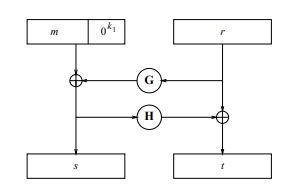
Αναλυτικότερα, έχουμε τα εξής:
- ***G***: μια hash function με output g bits
- ***H***: μια hash function με output h bits
- ***r***: μια συμβολοσειρά μήκους g bits

Έστω ***m*** το μήνυμα που θέλουμε να κρυπτογραφήσουμε με μήκος bits μικρότερο από g bits.

Αρχικά, δημιουργούμε το καινούριο μήνυμα ***m'***, το οποίο αποτελεί το παλιό μήνυμα m στο οποίο έχουμε προσθέσει στο τέλος (έχουμε κάνει **append**) όσα **μηδενικά** χρειάζεται για να φτάσουμε το νέο μήνυμα **να είναι μήκους g bits**.

Στη συνέχεια δημιουργούμε:

- To ***s*** το οποίο παράγεται κάνοντας: **m' XOR G(r)**.

- To ***t*** το οποίο παράγεται κάνοντας: **r XOR H(m' XOR G(r))**.

Τέλος, δημιουργούμε το ***Χ*** το οποίο αποτελεί την ένωση του **s || t** (δηλαδή **s append t**), και μετά κρυπτογραφούμε το X χρησιμοποιώντας το **RSA** και στέλνουμε το κρυπτογραφημένο μήνυμά μας. 


ref: ftp://ftp.di.ens.fr/pub/users/pointche/Papers/2002_cryptobytes.pdf

#### 3) Να μελετήσετε βιβλιογραφικα τις στρατηγικές first sign then encrypt & first encrypt then sign και να καταλήξετε σε κάποια συμπεράσματα (πλεονεκτήματα/μειονεκτήματα)

- Κατα την στρατηγική ***first sign then encrypt***, η λογική είναι η εξής:

Ο αποστολέας μαζί με το μήνυμά του, βάζει επίσης την ψηφιακή υπογραφή του. Στη συνέχεια, και τα δύο αυτά μαζί τα κρυπτογραφεί και τα στέλνει σε κάποιον παραλήπτη.

- Κατα την στρατηγική ***first encrypt then sign***, η λογική είναι η εξής:

Ο αποστολέας κρυπτογραφεί το μήνυμά του, στη συνέχεια βάζει την ψηφιακή υπογραφή του μαζί με το κρυπτογραφημένο πια μήνυμα και τα στέλνει σε κάποιον παραλήπτη.

#### Ανάλυση

Όταν χρησιμοποιούμε την ***first sign then encrypt*** στρατηγική, είναι προφανές ότι η ψηφιακή μας υπογραφή στέλνεται και αυτή κρυπτογραφημένη στον παραλήπτη. Αυτό σημαίνει πρακτικά ότι μόνο ο παραλήπτης μπορεί να αποκρυπτογραφήσει το μήνυμα και μετά να επιβεβαιώσει την ψηφιακή υπογραφή μου, ενώ αν κάποιος τρίτος πάρει στα χέρια του το cipher-text, δεν μπορεί να βγάλει κανένα συμπέρασμα ούτε για το μήνυμα ούτε για το ποιανού είναι η υπογραφή.

Όταν χρησιμοποιούμε την ***first encrypt then sign*** στρατηγική ωστόσο, η ψηφιακή μας υπογραφή στέλνεται μη-κρυπτογραφημένη μαζί με το κρυπτογραφημένο μήνυμα στον παραλήπτη. Αυτό σημαίνει ότι αν κάποιος τρίτος πάρει στα χέρια του το cipher-text του μηνύματος μαζί με την υπογραφή μου, μπορεί να δει ότι κάτι έχω υπογράψει αλλά δεν μπορεί φυσικά να δει το περιεχόμενο του μηνύματος. 

#### Συμπεράσματα

Καταλήγουμε λοιπόν στο συμπέρασμα ότι δεν υπάρχει σωστή η λάθος στρατηγική ανάμεσα στις δύο, καθώς εξαρτάται από το τι θέλουμε να πετύχουμε. Η κοινή λογική λέει πως από τι στιγμή που στέλνουμε ένα κρυπτογραφημένο κείμενο σε κάποιον, θέλουμε ένας τρίτος που πάρει στα χέρια του το cipher text να έχει όσο δυνατόν λιγότερη πληροφορία για αυτό, και άρα η στρατηγική ***first sign then encrypt*** φαντάζει πιο σωστή. 

Για παράδειγμα, αν έχω χρησιμοποιήσει την στρατηγική ***first encrypt then sign*** και κάποιος τρίτος πάρει στα χέρια του το cipher text με την υπογραφή μου που έστειλα στον παραλήπτη Χ, μπορεί να αλλάξει την υπογραφή μου, να εισάγει την υπογραφή του, και να στείλει το cipher text στον παραλήπτη Χ ως δικό του. Αυτό ελλωχεύει τον κίνδυνο ο Χ να έρθει σε επαφή με τον τρίτο, καθώς νομίζει ότι αυτός του έστειλε το cipher-text που αρχικά έστειλα εγώ, και να του αποκαλύψει άθελά του πληροφορίες για το αποκρυπτογραφημένο μήνυμα.

Ο μόνος λόγος για να χρησιμοποιήσουμε την στρατηγική ***first encrypt then sign*** θα ήταν εάν δεν θα μας πείραζε ή ακόμη καλύτερα αν θα θέλαμε να φαίνεται σε όλους, σε οποιονδήποτε μπορεί να πάρει το cipher-text, ότι το μήνυμα αυτό το έχω υπογράψει εγώ.